# Problema 4.6
###  Cálculo de X en un reactor con caída de presión
"Elementos de Ingeniería de las reacciones químicas" ,Scott Fogler capitulo 4, página 191

![newnotebook](../imágenes/problema4.6.png)

Primero importaremos la librerías que nos ayudaran a resolver el problema (No olvides activar las librerías con **Shift+enter**):

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def model(Data, W, eps=-0.15, kprime=0.0266, Fao=1.08, alpha=0.0166):
    """
    :param Data:
    :param W:
    :param eps:
    :param kprime:
    :param Fao:
    :param alpha:
    :return:
    """
    X, y = Data[0], Data[1]
    raprime = -kprime*(1-X)/(1+eps*X)
    f = (1+eps*X)/y
    rate = -raprime
    dXdW = -raprime/Fao
    dydW = -alpha*(1+eps*X)/(2*y)
    return [dXdW, dydW]


In [13]:
# condiciones iniciales
Data0 = [0.0, 1.0]

# Volúmen
W = np.linspace(0, 60, 500)

# Solución de ODES
Data = odeint(model, Data0, W)

X, y = Data[:, 0], Data[:, 1]
eps = -0.15
kprime = 0.0266
f = (1+eps*X)/y
rate = -kprime*(1-X)/(1+eps*X)


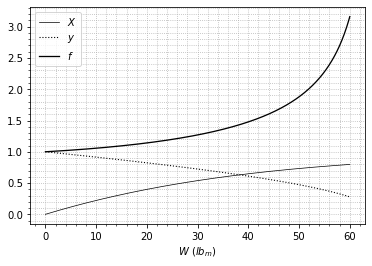

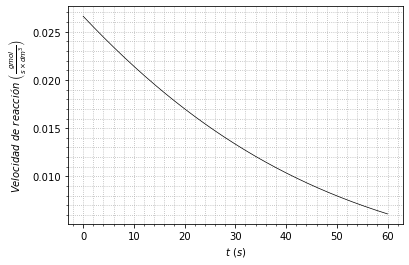

In [11]:
# Graficando solución de ODE
fig = plt.figure()
ax = fig.add_subplot(111)
ax.minorticks_on()
ax.plot(W, X, 'black', linewidth=0.7, label='$X$')
ax.plot(W, y, 'k:', linewidth=1.1, label='$y$')
ax.plot(W, f, 'k', linewidth=1.3, label='$f$')
# ax.plot(t, Cd, 'black', linewidth=0.7, label='$C_D$')
ax.set_xlabel('$W \\ (lb_m)$')
ax.grid(which='BOTH', ls=':')
ax.grid(True)
ax.legend()

fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.minorticks_on()
ax1.plot(W, -rate, 'black', linewidth=0.7)
ax1.set_xlabel('$t \\ (s)$')
ax1.set_ylabel('$Velocidad \\ de \\ reacción \\ \\left( ' +
               '\\frac{gmol}{s\\times dm^3} \\right)$')
ax1.grid(which='BOTH', ls=':')
ax1.grid(True)
plt.show()